<a href="https://colab.research.google.com/github/DS123-ally/Flood_Classification/blob/main/Flood_Risk_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ILibraries Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/archive.csv")

In [ ]:
df

,X,Y,Slope,Curvature,Aspect,TWI,FA,Drainage,Rainfall,SUSCEP
0,3.909444,7.443056,46.686142,-3.888000e+09,45.000000,-3.250368,147.0,228.8528,101.515616,Very_High
1,3.908611,7.442778,52.151768,1.296000e+09,60.945396,-4.313832,61.0,229.6781,80.409863,Very_High
2,3.908889,7.442778,66.484085,0.000000e+00,67.619865,-8.327622,1.0,230.5920,78.986849,Very_High
3,3.909167,7.442778,58.007183,-2.592000e+09,38.659809,-4.707937,51.0,235.4210,81.953151,Very_High
4,3.909444,7.442778,60.503792,-1.296000e+09,351.869904,-5.985817,15.0,234.4346,85.866027,Very_High
...,...,...,...,...,...,...,...,...,...,...
144396,3.864167,7.311667,70.837776,1.296000e+09,272.489563,-8.552538,1.0,211.7292,63.087945,Low
144397,3.864444,7.311667,72.578880,1.296000e+09,295.559967,-9.347733,0.0,220.4144,60.489041,Moderate
144398,3.864722,7.311667,70.667946,6.480000e+09,322.125030,-9.236161,0.0,216.3101,62.886849,Low
144399,3.859722,7.311389,61.980232,1.296000e+09,183.814072,-8.819514,0.0,214.3301,66.044932,Low


In [ ]:
df.head(5)

,X,Y,Slope,Curvature,Aspect,TWI,FA,Drainage,Rainfall,SUSCEP
0,3.909444,7.443056,46.686142,-3.888000e+09,45.000000,-3.250368,147.0,228.8528,101.515616,Very_High
1,3.908611,7.442778,52.151768,1.296000e+09,60.945396,-4.313832,61.0,229.6781,80.409863,Very_High
2,3.908889,7.442778,66.484085,0.000000e+00,67.619865,-8.327622,1.0,230.5920,78.986849,Very_High
3,3.909167,7.442778,58.007183,-2.592000e+09,38.659809,-4.707937,51.0,235.4210,81.953151,Very_High
4,3.909444,7.442778,60.503792,-1.296000e+09,351.869904,-5.985817,15.0,234.4346,85.866027,Very_High


In [ ]:
df.tail(5)

,X,Y,Slope,Curvature,Aspect,TWI,FA,Drainage,Rainfall,SUSCEP
144396,3.864167,7.311667,70.837776,1.296000e+09,272.489563,-8.552538,1.0,211.7292,63.087945,Low
144397,3.864444,7.311667,72.578880,1.296000e+09,295.559967,-9.347733,0.0,220.4144,60.489041,Moderate
144398,3.864722,7.311667,70.667946,6.480000e+09,322.125030,-9.236161,0.0,216.3101,62.886849,Low
144399,3.859722,7.311389,61.980232,1.296000e+09,183.814072,-8.819514,0.0,214.3301,66.044932,Low
144400,3.860000,7.311389,68.768135,5.184000e+09,150.945389,-9.134113,0.0,211.5915,101.515616,Low


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144401 entries, 0 to 144400
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   X           144401 non-null  float64
 1   Y           144401 non-null  float64
 2   Slope       144119 non-null  float64
 3   Curvature   144401 non-null  float64
 4   Aspect      144401 non-null  float64
 5   TWI         144401 non-null  float64
 6   FA          144401 non-null  float64
 7   Drainage    144401 non-null  float64
 8   Rainfall    144401 non-null  float64
 9   SUSCEP      144401 non-null  object 
dtypes: float64(9), object(1)
memory usage: 11.0+ MB
None


In [ ]:
#Data Cleaning
df.columns=df.columns.str.strip()
print(df.columns)

Index(['X', 'Y', 'Slope', 'Curvature', 'Aspect', 'TWI', 'FA', 'Drainage',
       'Rainfall', 'SUSCEP'],
      dtype='object')


In [ ]:
import numpy as np
df=df.replace(-3.402820e+38,np.nan)


In [ ]:
print(df.isnull().sum())

X              0
Y              0
Slope        282
Curvature      0
Aspect         0
TWI            0
FA             0
Drainage       0
Rainfall       0
SUSCEP         0
dtype: int64


In [ ]:
df["Slope"]=df["Slope"].fillna(df["Slope"].median())

In [ ]:
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())


Duplicates before: 0
Duplicates after: 0


In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
df["SUSCEP"]=Le.fit_transform(df["SUSCEP"])
print("Target Mapping:", dict(zip(Le.classes_,Le.transform(Le.classes_))))

Target Mapping: {'High': np.int64(0), 'Low': np.int64(1), 'Moderate': np.int64(2), 'No_Flood': np.int64(3), 'Very_High': np.int64(4)}


In [ ]:
print(df.isnull().sum())
print(df.head())


X            0
Y            0
Slope        0
Curvature    0
Aspect       0
TWI          0
FA           0
Drainage     0
Rainfall     0
SUSCEP       0
dtype: int64
          X         Y      Slope     Curvature      Aspect       TWI     FA  \
0  3.909444  7.443056  46.686142 -3.888000e+09   45.000000 -3.250368  147.0   
1  3.908611  7.442778  52.151768  1.296000e+09   60.945396 -4.313832   61.0   
2  3.908889  7.442778  66.484085  0.000000e+00   67.619865 -8.327622    1.0   
3  3.909167  7.442778  58.007183 -2.592000e+09   38.659809 -4.707937   51.0   
4  3.909444  7.442778  60.503792 -1.296000e+09  351.869904 -5.985817   15.0   

   Drainage    Rainfall  SUSCEP  
0  228.8528  101.515616       4  
1  229.6781   80.409863       4  
2  230.5920   78.986849       4  
3  235.4210   81.953151       4  
4  234.4346   85.866027       4  


In [ ]:
#Trainig the Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
models={
    "LogisticRegression":LogisticRegression(max_iter=1000,multi_class="multinomial",random_state=42),
    "RandomForestClassifier":RandomForestClassifier(n_estimators=100,random_state=42),
    "DecisionTreeClassifier":DecisionTreeClassifier(random_state=42),
    "GradientBoostingClassifier":GradientBoostingClassifier(random_state=42),
    "XGBClassifier":XGBClassifier(use_label_encoder=False,eval_metric="nlogloss",random_state=42)
}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, multi_class="multinomial", random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred_log = log_reg.predict(X_test_scaled)

print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log, target_names=label_encoder.classes_))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


🔹 Logistic Regression Accuracy: 0.9849728195007098


TypeError: object of type 'numpy.int64' has no len()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("🔹 Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_))


🔹 Decision Tree Accuracy: 1.0


TypeError: object of type 'numpy.int64' has no len()

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("🔹 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))


🔹 Random Forest Accuracy: 1.0


TypeError: object of type 'numpy.int64' has no len()

In [ ]:
#Graident Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

print("🔹 Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb, target_names=label_encoder.classes_))


🔹 Gradient Boosting Accuracy: 1.0


TypeError: object of type 'numpy.int64' has no len()

In [ ]:
#XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("🔹 XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:04:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔹 XGBoost Accuracy: 1.0


TypeError: object of type 'numpy.int64' has no len()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:11:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


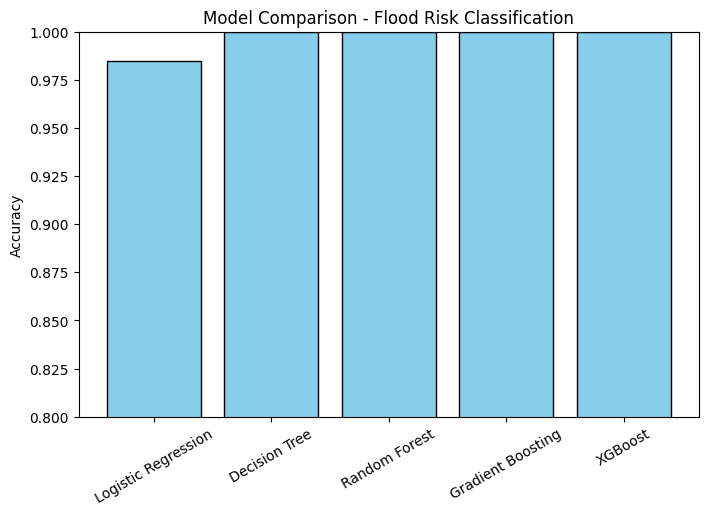

🏆 Best Model: Decision Tree with Accuracy = 1.0000


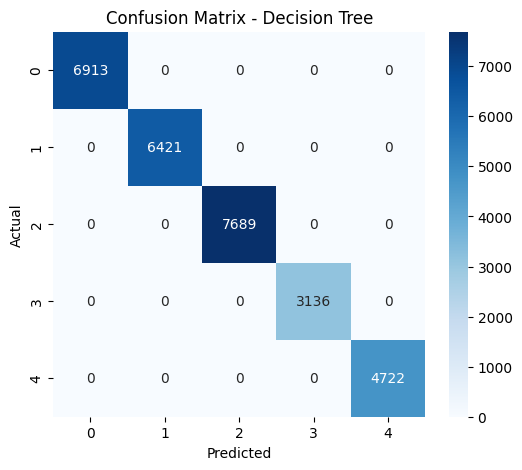

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- Step 1: Train and Compare Accuracies ---
results = {}

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, multi_class="multinomial", random_state=42)
log_reg.fit(X_train_scaled, y_train)
results["Logistic Regression"] = accuracy_score(y_test, log_reg.predict(X_test_scaled))

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
results["Decision Tree"] = accuracy_score(y_test, dt.predict(X_test))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
results["Random Forest"] = accuracy_score(y_test, rf.predict(X_test))

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
results["Gradient Boosting"] = accuracy_score(y_test, gb.predict(X_test))

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb.fit(X_train, y_train)
results["XGBoost"] = accuracy_score(y_test, xgb.predict(X_test))

# --- Step 2: Plot Accuracies ---
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color="skyblue", edgecolor="black")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Flood Risk Classification")
plt.xticks(rotation=30)
plt.ylim(0.8, 1.0)
plt.show()

# --- Step 3: Pick Best Model ---
best_model_name = max(results, key=results.get)
print(f"🏆 Best Model: {best_model_name} with Accuracy = {results[best_model_name]:.4f}")

# Select the trained best model
if best_model_name == "Logistic Regression":
    best_model = log_reg
    y_pred_best = best_model.predict(X_test_scaled)
else:
    best_model = {"Decision Tree": dt, "Random Forest": rf, "Gradient Boosting": gb, "XGBoost": xgb}[best_model_name]
    y_pred_best = best_model.predict(X_test)

# --- Step 4: Confusion Matrix Heatmap ---
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:14:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


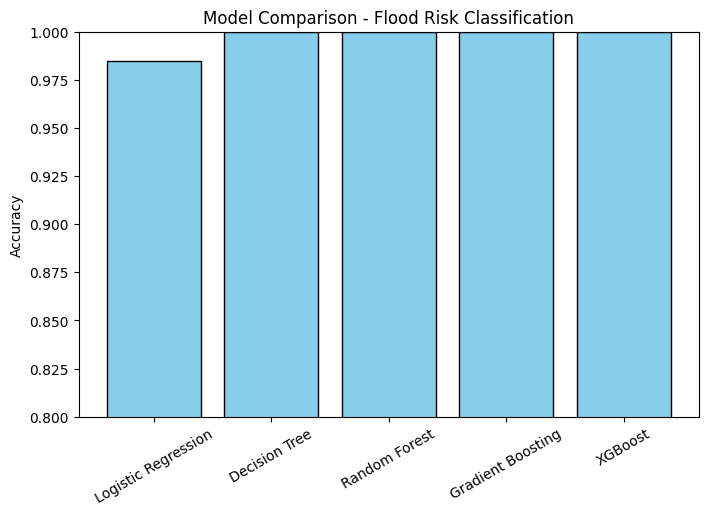

🏆 Best Model: Decision Tree with Accuracy = 1.0000


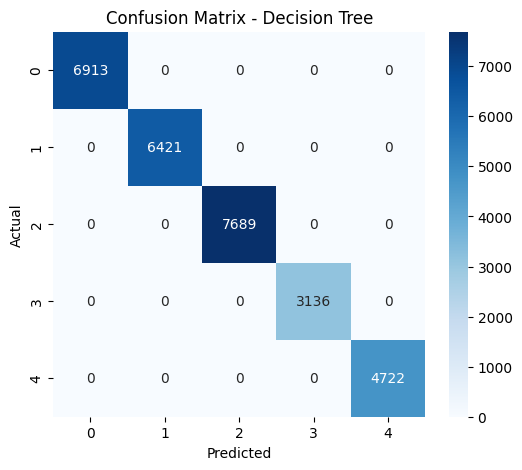

/tmp/ipython-input-2743729758.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=feature_names[indices], palette="viridis")


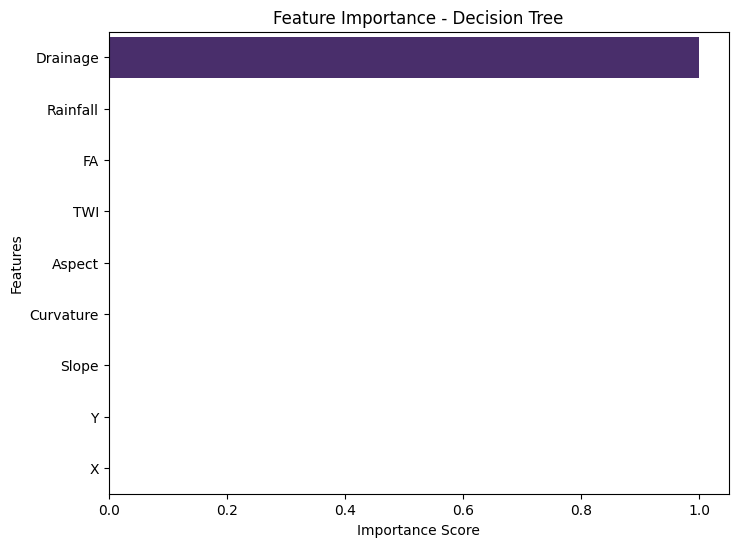

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- Step 1: Train & Compare Accuracies (same as before) ---
results = {}

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, multi_class="multinomial", random_state=42)
log_reg.fit(X_train_scaled, y_train)
results["Logistic Regression"] = accuracy_score(y_test, log_reg.predict(X_test_scaled))

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
results["Decision Tree"] = accuracy_score(y_test, dt.predict(X_test))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
results["Random Forest"] = accuracy_score(y_test, rf.predict(X_test))

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
results["Gradient Boosting"] = accuracy_score(y_test, gb.predict(X_test))

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb.fit(X_train, y_train)
results["XGBoost"] = accuracy_score(y_test, xgb.predict(X_test))

# --- Step 2: Accuracy Bar Chart ---
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color="skyblue", edgecolor="black")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Flood Risk Classification")
plt.xticks(rotation=30)
plt.ylim(0.8, 1.0)
plt.show()

# --- Step 3: Pick Best Model ---
best_model_name = max(results, key=results.get)
print(f"🏆 Best Model: {best_model_name} with Accuracy = {results[best_model_name]:.4f}")

if best_model_name == "Logistic Regression":
    best_model = log_reg
    y_pred_best = best_model.predict(X_test_scaled)
else:
    best_model = {"Decision Tree": dt, "Random Forest": rf, "Gradient Boosting": gb, "XGBoost": xgb}[best_model_name]
    y_pred_best = best_model.predict(X_test)

# --- Step 4: Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

# --- Step 5: Feature Importance (only for tree-based models) ---
if best_model_name in ["Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost"]:
    importances = best_model.feature_importances_
    feature_names = X.columns

    # Sort features by importance
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(8,6))
    sns.barplot(x=importances[indices], y=feature_names[indices], palette="viridis")
    plt.title(f"Feature Importance - {best_model_name}")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.show()
else:
    print("⚠ Logistic Regression does not support feature_importances_.")
